In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def f(x):
    return -2*(x**2) + 8*x + 10

In [3]:
def plot_f(f, min_x, max_x):
    x_axis = np.linspace(min_x, max_x, 100)
    fig, ax = plt.subplots()
    ax.plot(x_axis, f(x_axis), linewidth=3, label='f', c='b')
    #ax.axhline(y=0, color='k')
    #ax.axvline(x=0, color='k')
    #ax.set_xlim(-8, 8)
    #ax.set_ylim(-30, 30)


    # set the spine locations
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    #ax.spines['left'].set_color('r')
    #ax.spines['bottom'].set_color('r')

    # turn off the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.grid(True, which='both')



    ax.legend()

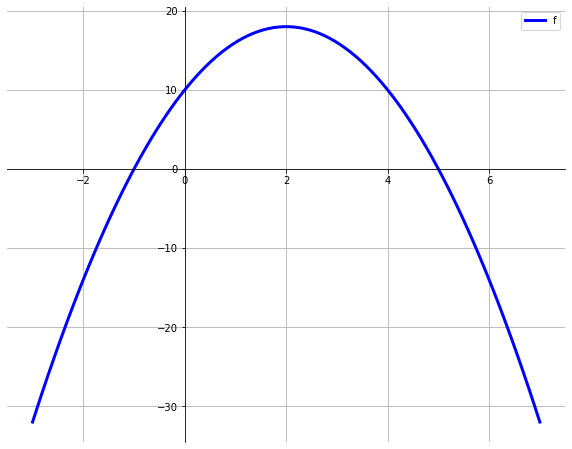

In [4]:
plot_f(f, -3, 7)

In [5]:
rs = np.random.RandomState(seed=42)

In [6]:
def sa(f, curr_s, T, step_size = 1, min_wall = None, max_wall = None):
    
    curr_states = []
    curr_fvalues = []

    #curr_s = 4

    #T = 10

    max_iter = T+10

    for i in range(max_iter):
        if T > 0:
            T -= 1


        curr_states.append(curr_s)

        print("Iter: {} ".format(i))
        print("Temperature: {}".format(T))
        print("Current_s: {}".format(curr_s))

        # next
        

        
        
        if rs.random() > 0.5:
            next_s = curr_s + step_size
        else:
            next_s = curr_s - step_size
            
        if min_wall is not None and curr_s <= min_wall:
            next_s = curr_s + step_size
        
        if max_wall is not None and  curr_s >= max_wall:
            next_s = curr_s - step_size

        print("Candidate next_s: {}".format(next_s))

        curr_v = f(curr_s)
        next_v = f(next_s)
        
        curr_fvalues.append(curr_v)

        diff = next_v - curr_v

        # maximize
        if diff > 0:
            curr_s = next_s
            print("Better. Accepted.")
        elif T == 0:
            print("Temperature is now zero, and the candidate is worse than current. Exiting loop.")
            break
        else:
            p = 1/np.exp(-1*diff/T)

            print("Acceptance prob: {:.2f}".format(p))

            if p > rs.random():
                curr_s = next_s
                print("Worse. Accepted.")
            else:
                print("Worse. Rejected.")

        print()
    return curr_states, curr_fvalues

In [7]:
curr_states, curr_fvalues = sa(f, curr_s=4, T=100)

Iter: 0 
Temperature: 99
Current_s: 4
Candidate next_s: 3
Better. Accepted.

Iter: 1 
Temperature: 98
Current_s: 3
Candidate next_s: 4
Acceptance prob: 0.94
Worse. Accepted.

Iter: 2 
Temperature: 97
Current_s: 4
Candidate next_s: 5
Acceptance prob: 0.90
Worse. Accepted.

Iter: 3 
Temperature: 96
Current_s: 5
Candidate next_s: 4
Better. Accepted.

Iter: 4 
Temperature: 95
Current_s: 4
Candidate next_s: 3
Better. Accepted.

Iter: 5 
Temperature: 94
Current_s: 3
Candidate next_s: 4
Acceptance prob: 0.94
Worse. Accepted.

Iter: 6 
Temperature: 93
Current_s: 4
Candidate next_s: 5
Acceptance prob: 0.90
Worse. Accepted.

Iter: 7 
Temperature: 92
Current_s: 5
Candidate next_s: 6
Acceptance prob: 0.86
Worse. Accepted.

Iter: 8 
Temperature: 91
Current_s: 6
Candidate next_s: 5
Better. Accepted.

Iter: 9 
Temperature: 90
Current_s: 5
Candidate next_s: 4
Better. Accepted.

Iter: 10 
Temperature: 89
Current_s: 4
Candidate next_s: 3
Better. Accepted.

Iter: 11 
Temperature: 88
Current_s: 3
Candidat

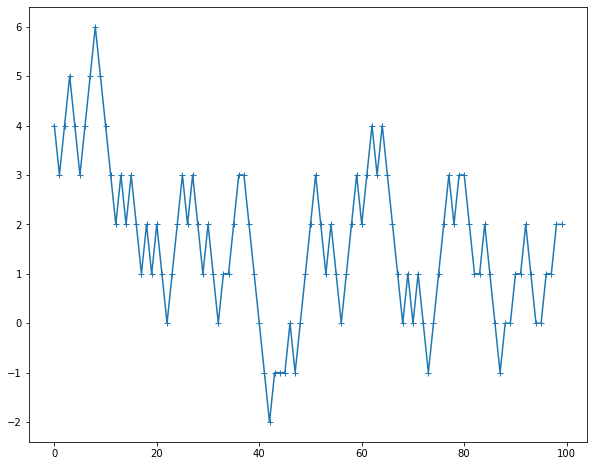

In [8]:
plt.plot(range(len(curr_states)), curr_states, marker='+')

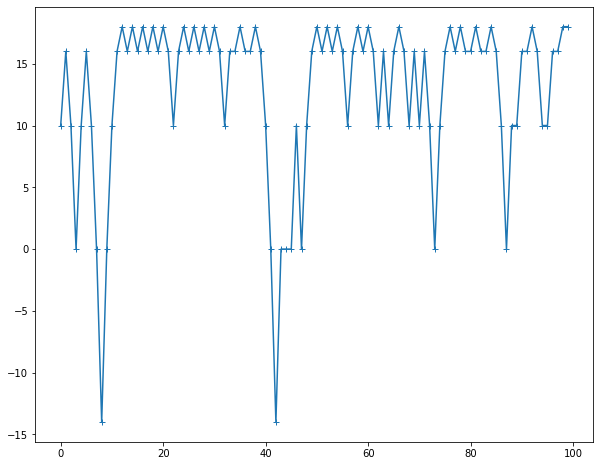

In [9]:
plt.plot(range(len(curr_fvalues)), curr_fvalues, marker='+')

In [10]:
def f2(x):
    return -(x**5)-2*(x**4)+13*(x**3)+14*(x**2)-24*x

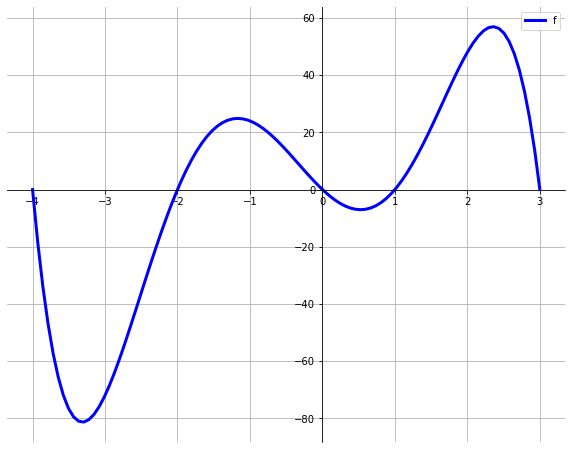

In [11]:
plot_f(f2, -4, 3)

In [12]:
curr_states, curr_fvalues = sa(f2, curr_s = -2, T = 100, step_size = 0.5, min_wall = -4, max_wall = 3)

Iter: 0 
Temperature: 99
Current_s: -2
Candidate next_s: -1.5
Better. Accepted.

Iter: 1 
Temperature: 98
Current_s: -1.5
Candidate next_s: -2.0
Acceptance prob: 0.81
Worse. Accepted.

Iter: 2 
Temperature: 97
Current_s: -2.0
Candidate next_s: -1.5
Better. Accepted.

Iter: 3 
Temperature: 96
Current_s: -1.5
Candidate next_s: -2.0
Acceptance prob: 0.80
Worse. Accepted.

Iter: 4 
Temperature: 95
Current_s: -2.0
Candidate next_s: -2.5
Acceptance prob: 0.68
Worse. Accepted.

Iter: 5 
Temperature: 94
Current_s: -2.5
Candidate next_s: -2.0
Better. Accepted.

Iter: 6 
Temperature: 93
Current_s: -2.0
Candidate next_s: -1.5
Better. Accepted.

Iter: 7 
Temperature: 92
Current_s: -1.5
Candidate next_s: -2.0
Acceptance prob: 0.80
Worse. Rejected.

Iter: 8 
Temperature: 91
Current_s: -1.5
Candidate next_s: -2.0
Acceptance prob: 0.79
Worse. Accepted.

Iter: 9 
Temperature: 90
Current_s: -2.0
Candidate next_s: -2.5
Acceptance prob: 0.67
Worse. Accepted.

Iter: 10 
Temperature: 89
Current_s: -2.5
Cand

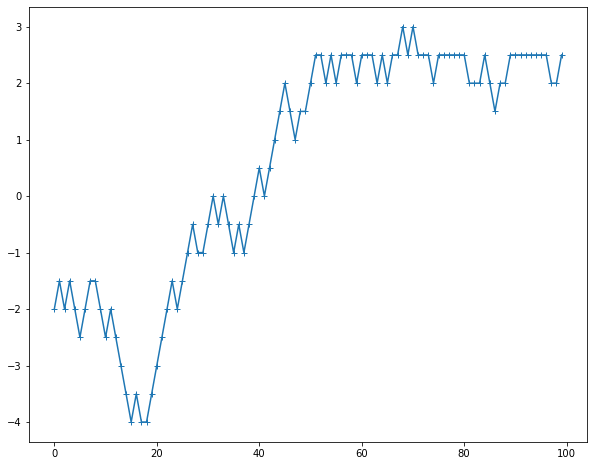

In [13]:
plt.plot(range(len(curr_states)), curr_states, marker='+')

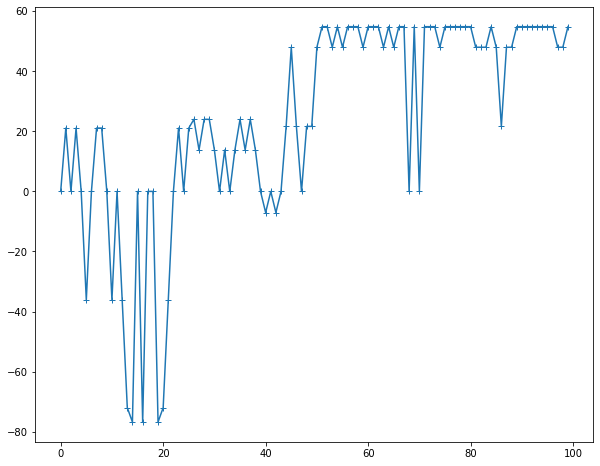

In [14]:
plt.plot(range(len(curr_fvalues)), curr_fvalues, marker='+')

In [15]:
def acceptance_prob(c, n, f, T):
    c_v = f(c)
    n_v = f(n)
    d = n_v - c_v
    
    if d > 0:
        return 1
    else:
        return 1/np.exp(-1*d/T)

In [16]:
c = -4
n = -3.5
max_T = 100
probs = [acceptance_prob(c, n, f2, i) for i in range(1, max_T)]

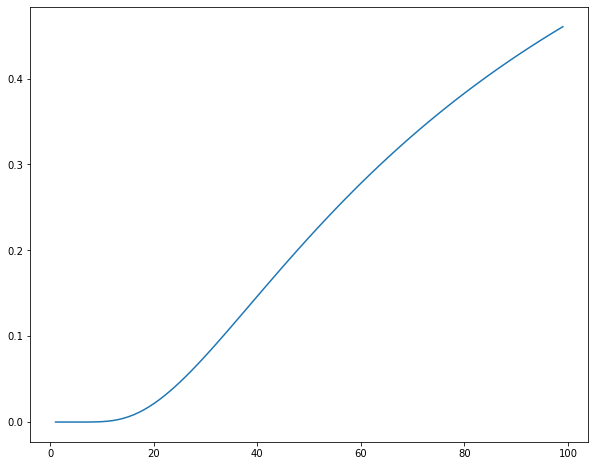

In [17]:
plt.plot(range(1, max_T), probs)